# Lab 1

Встановити OpenCV, зчитати зображення з вебки, відобразити в першому віконці та записати його на диск.
Після цього зчитати щойно записане зображення з диску, конвертувати у відтінки сірого та намалювати
на ньому довільних кольорів лінію та прямокутник (наприклад червону лінію та синій прямокутник) і відобразити у другому віконці. Ні це не психотест, для дебагу це ще й як знадобиться.

Бонуси за виконання цих кроків для відеоряду і бонуси до бонусів якщо в результаті цих кроків замість звалища картинок матимемо відеофайл (наприклад .avi)

In [29]:
import cv2
import time
import numpy as np

from IPython.display import Image

### Taking photo and editing it

In [34]:
def edit_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #change colorspase from colored to black&white
    image = cv2.cvtColor(image,cv2.COLOR_GRAY2BGR) #change it back to colored. it`s done to make colored figures on image

    colors = [(68, 65, 249), (44, 114, 243), (30, 150, 248), (79, 199, 249), (109, 190, 144), (139, 170, 67)]

    cv2.rectangle(image, (10,10), (60,60), colors[0], 1)
    cv2.rectangle(image, (20,20), (70,70), colors[1], 1)
    cv2.rectangle(image, (30,30), (80,80), colors[2], 1)

    x = image.shape[0]
    y = image.shape[1]

    cv2.line(image, (0,x-20), (y-10,x-20), colors[3], 1)
    cv2.line(image, (y-20,0), (y-20,x-10), colors[4], 1)
    cv2.line(image, (y-30,30), (y-30,230), colors[5], 1)

    pic = cv2.imread("pic.png")
    pic = cv2.resize(pic, (0,0), fx=0.33, fy=0.33) 
    x0 = x - pic.shape[0] - 30
    y0 = 25
    image[x0:x0+pic.shape[0], y0:y0+pic.shape[1]] = pic 
    #as you may notice, i`m very creative person
    
    return image

In [49]:
cam = cv2.VideoCapture(0)

s, img = cam.read()
if s:
    cam.release()
    cv2.imshow("photo", img)
    cv2.imwrite("photo.jpg", img)
    cv2.waitKey(1) 
else:
    print('smth is wrong with your camera')

image = cv2.imread("photo.jpg")
image = edit_img(image)
cv2.imshow("edited_photo", image)
cv2.imwrite("edited_photo.jpg", image)

cv2.waitKey(0) #press any key to close window with photos (it must be active)
cv2.destroyAllWindows()

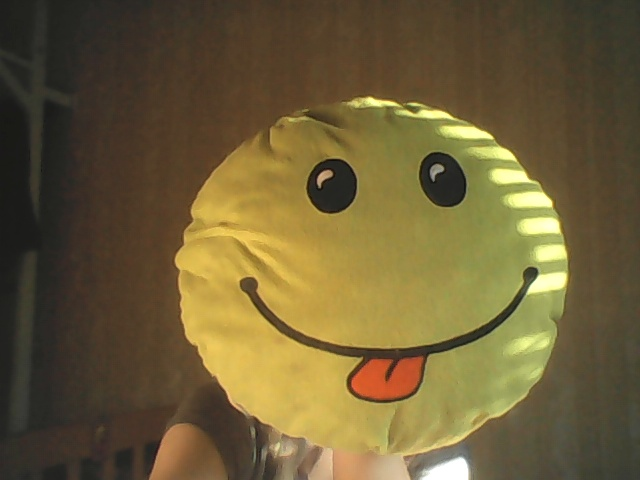

In [50]:
Image(filename='photo.jpg', width=350) # result (and checking if it was writed correctly)

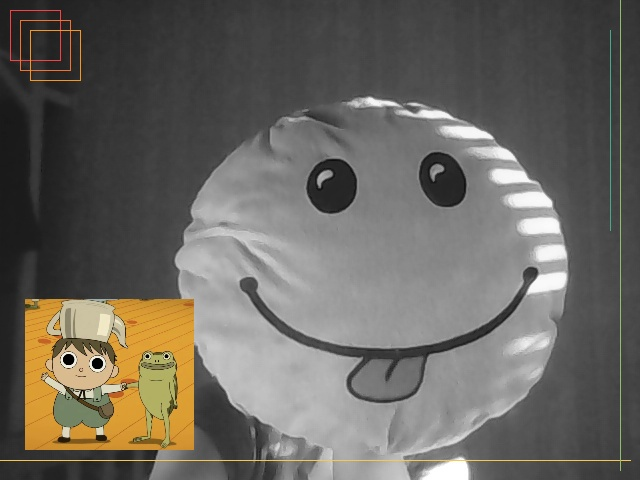

In [51]:
Image(filename='edited_photo.jpg', width=350) # result (and checking if it was writed correctly)

### Recording video

In [64]:
cam = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('video.mp4',fourcc, 10, (640,480)) #num of fps depends on your notebook`s camera
start = time.time() 

while(cam.isOpened()):
    ret, frame = cam.read()
    if ret==True:
        out.write(frame)
        cv2.imshow('recording video...',frame)
        if cv2.waitKey(1) & ((time.time() - start) > 5): 
            break #stops recording afrer 5 seconds
    else:
        break

cam.release()
out.release()
cv2.destroyAllWindows()

### Editing video

In [65]:
def edit_frame(image, i):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #change colorspase from colored to black&white
    image = cv2.cvtColor(image,cv2.COLOR_GRAY2BGR) #change it back to colored. it`s done to make colored figures on image
    
    if (i%3 == 0): 
        color = (68, 65, 249)
        d = 10
    elif (i%3 == 1):
        color = (30, 150, 248)
        d = 20
    else:
        color = (139, 170, 67)
        d = 30
        
    x = image.shape[0]
    y = image.shape[1]
    cv2.rectangle(image, (d,d), (y-d, x-d), color, 1)
    cv2.line(image, (y-2,0), (y-2,x), color, 1)
    
    return image

In [68]:
cam = cv2.VideoCapture('video.mp4')

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('edited_video.mp4',fourcc, 10.0, (640,480)) #num of fps depends on your notebook`s camera

start = time.time() 
i = 0

while(cam.isOpened()):
    ret, frame = cam.read()
    if ret==True:
        frame = edit_frame(frame, i) 
        out.write(frame)
        cv2.imshow('edited_video',frame)
        i += 1
        if cv2.waitKey(10*5) & ((time.time() - start) > 5): 
            break #shows video
    else:
        break

cam.release()
out.release()
cv2.destroyAllWindows()

won't be examples of videos, because notebook has some bugs and doen't shows them. open them from folder, please